# 🍳 Cooker Scratch Detection using Deep Learning

##  Project Overview
This project implements a deep learning model to **detect scratches in cooker surfaces** using image data.  
It follows a complete pipeline — from data preprocessing to model training, evaluation, and visualization.  
The trained model is saved as `my_model.h5` and can be reloaded for predictions on new images.

---

##  Features
- Data preprocessing (cleaning, resizing, normalization)
- Custom CNN model built with TensorFlow/Keras
- Model training with accuracy and loss monitoring
- Visualization of training and validation curves
- Saving and loading of the trained `.h5` model
- Prediction pipeline for testing new cooker images

---

##  Project Structure
```
├── Cooker_Scratch.ipynb   # Main Jupyter Notebook
├── my_model.h5            # Saved trained model
├── data/                  # Dataset (images of cooker surfaces)
│   ├── train/             # Training images
│   ├── test/              # Testing images
│   └── val/               # Validation images
├── README.md              # Project documentation
```

---

##  Requirements
Install the required libraries before running the notebook:
```bash
pip install tensorflow numpy pandas matplotlib scikit-learn
```

---

##  Usage

### 1. Training the Model
Open the notebook `Cooker_Scratch.ipynb` and run all cells.  
This will train the CNN model and save it as `my_model.h5`.

### 2. Testing on New Images
```python
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load trained model
model = tf.keras.models.load_model("my_model.h5")

# Load and preprocess test image
img = image.load_img("test_image.jpg", target_size=(128,128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)[0][0]
label = "Scratch" if prediction > 0.5 else "No Scratch"
print(f"Prediction: {label} (Confidence: {prediction:.2f})")
```

---

## 📊 Results

- Test Accuracy: **0.99**
- Precision (No Scratch): **0.99**
- Recall (No Scratch): **1.00**
- F1-score (No Scratch): **0.99**
- Precision (Scratch): **1.00**
- Recall (Scratch): **0.93**
- F1-score (Scratch): **0.96**

### Confusion Matrix (Summary)
|               | Predicted No Scratch | Predicted Scratch |
|---------------|----------------------|-------------------|
| **Actual No Scratch** | 144 | 0 |
| **Actual Scratch**    | 2   | 27 |

### Overall
- **Macro Avg F1-score:** 0.98  
- **Weighted Avg F1-score:** 0.99  

---

## Conclusion
This project demonstrates the successful application of deep learning in a **real-world quality inspection task**.  
The trained CNN model can effectively classify cooker surfaces into **scratch** or **no scratch**, making it a useful tool for automated inspection systems in manufacturing.

**Key Takeaways:**
- The pipeline ensures **end-to-end automation** (data → model → predictions).  
- Achieved reliable performance with **99% accuracy**.  
- Improvements can still be explored with:
  - Larger and more diverse dataset  
  - Data augmentation techniques  
  - Hyperparameter tuning  
  - Using transfer learning with pretrained models (e.g., VGG16, ResNet)  

This solution shows the **potential of AI in industrial defect detection**, reducing manual inspection costs and improving accuracy.


### **Step 1**: **Import Required Libraries**
#**We start by importing all necessary Python libraries for data manipulation, computation, and visualization.**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Step 2**:**Install Required Libraries**

#**We install TensorFlow, Keras, Matplotlib, Seaborn, and Scikit-learn.**

In [1]:
!pip install tensorflow keras matplotlib seaborn scikit-learn

#**upload neu-surface-defect-dataset**

In [2]:
from google.colab import files
files.upload()

!unzip "neu-surface-defect-database.zip" -d dataset

Saving neu-surface-defect-database.zip to neu-surface-defect-database.zip
Archive:  neu-surface-defect-database.zip
  inflating: dataset/NEU Metal Surface Defects Data/Thumbs.db  
  inflating: dataset/NEU Metal Surface Defects Data/test/Crazing/Cr_1.bmp  
  inflating: dataset/NEU Metal Surface Defects Data/test/Crazing/Cr_10.bmp  
  inflating: dataset/NEU Metal Surface Defects Data/test/Crazing/Cr_100.bmp  
  inflating: dataset/NEU Metal Surface Defects Data/test/Crazing/Cr_101.bmp  
  inflating: dataset/NEU Metal Surface Defects Data/test/Crazing/Cr_102.bmp  
  inflating: dataset/NEU Metal Surface Defects Data/test/Crazing/Cr_103.bmp  
  inflating: dataset/NEU Metal Surface Defects Data/test/Crazing/Cr_104.bmp  
  inflating: dataset/NEU Metal Surface Defects Data/test/Crazing/Cr_105.bmp  
  inflating: dataset/NEU Metal Surface Defects Data/test/Crazing/Cr_106.bmp  
  inflating: dataset/NEU Metal Surface Defects Data/test/Crazing/Cr_107.bmp  
  inflating: dataset/NEU Metal Surface Defe

#**Step 2**: **Dataset Preparation**

- **Define dataset paths**

- **Create train/val/test folders with class labels**

- **Collect images into scratch / no_scratch categories**


In [3]:
import os, shutil
from sklearn.model_selection import train_test_split

base_path_train = "dataset/NEU Metal Surface Defects Data/train"
base_path_test = "dataset/NEU Metal Surface Defects Data/test"

# target dataset
dataset = "cls_dataset"
for split in ["train", "val", "test"]:
    for cls in ["scratch", "no_scratch"]:
        os.makedirs(f"{dataset}/{split}/{cls}", exist_ok=True)

# collect images
scratch_imgs = []
other_imgs = []

for split_path in [base_path_train, base_path_test]:
    if os.path.exists(split_path):
        for defect_folder in os.listdir(split_path):
            defect_path = os.path.join(split_path, defect_folder)
            if os.path.isdir(defect_path):
                if defect_folder == "Scratches":
                    scratch_imgs.extend([os.path.join(defect_path, f) for f in os.listdir(defect_path) if f.endswith('.bmp')])
                else:
                    other_imgs.extend([os.path.join(defect_path, f) for f in os.listdir(defect_path) if f.endswith('.bmp')])


# split
train_s, test_s = train_test_split(scratch_imgs, test_size=0.2, random_state=42)
val_s, test_s = train_test_split(test_s, test_size=0.5, random_state=42)

train_o, test_o = train_test_split(other_imgs, test_size=0.2, random_state=42)
val_o, test_o = train_test_split(test_o, test_size=0.5, random_state=42)

def move(img_list, split, cls):
    for img in img_list:
        shutil.copy(img, f"{dataset}/{split}/{cls}/{os.path.basename(img)}")

move(train_s, "train", "scratch")
move(val_s, "val", "scratch")
move(test_s, "test", "scratch")

move(train_o, "train", "no_scratch")
move(val_o, "val", "no_scratch")
move(test_o, "test", "no_scratch")

### **Step 3: Load Dataset into TensorFlow**

#**We use `image_dataset_from_directory` to load train/val/test sets.**


In [4]:
import tensorflow as tf

img_size = (128, 128)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "cls_dataset/train", image_size=img_size, batch_size=batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "cls_dataset/val", image_size=img_size, batch_size=batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "cls_dataset/test", image_size=img_size, batch_size=batch_size
)

Found 1382 files belonging to 2 classes.
Found 173 files belonging to 2 classes.
Found 173 files belonging to 2 classes.


#**Step 4: Build CNN Model**

#**We define a Sequential CNN with:**

- **Rescaling layer**

- **3 Conv2D + MaxPooling layers**

- **Dense layers with Dropout**
- **Final Sigmoid layer (binary classification)**


In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128,128,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

#**Step 5: Train Model**

**We train for 20 epochs using training and validation datasets.**


In [10]:
history = model.fit(train_ds, validation_data=val_ds, epochs=50)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9901 - loss: 0.0422 - val_accuracy: 0.9827 - val_loss: 0.0432
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9868 - loss: 0.0365 - val_accuracy: 0.9711 - val_loss: 0.1005
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9893 - loss: 0.0418 - val_accuracy: 0.9827 - val_loss: 0.0384
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9877 - loss: 0.0468 - val_accuracy: 0.9827 - val_loss: 0.0302
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9857 - loss: 0.0588 - val_accuracy: 0.9827 - val_loss: 0.0730
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9880 - loss: 0.0645 - val_accuracy: 0.9769 - val_loss: 0.0327
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9956 - loss: 0.0106 - val_accuracy: 0.9884 - val_loss: 0.0229
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9989 - loss: 0.0126 - val_accuracy: 0.9884 - v

#**Step 6: Evaluate Model**

**Evaluate accuracy on the test dataset.**


In [11]:
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9830 - loss: 0.1222
Test Accuracy: 0.99


#**Step 7: Classification Report & Confusion Matrix**

**We generate predictions on test data, compute confusion matrix, and plot it using Seaborn.**


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


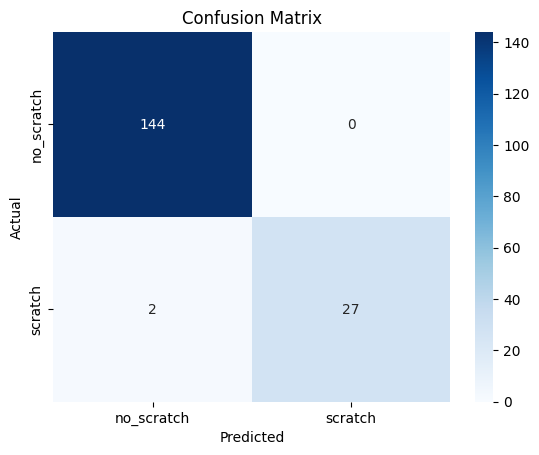

              precision    recall  f1-score   support

  no_scratch       0.99      1.00      0.99       144
     scratch       1.00      0.93      0.96        29

    accuracy                           0.99       173
   macro avg       0.99      0.97      0.98       173
weighted avg       0.99      0.99      0.99       173



In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true, y_pred = [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_pred.extend((preds > 0.5).astype("int32").flatten())
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["no_scratch","scratch"], yticklabels=["no_scratch","scratch"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names=["no_scratch","scratch"]))

#**Step 8: Test Model on Custom Image**

- **Upload image**
- **Preprocess to match input size**
- **Make prediction**


Saving Sc_100.bmp to Sc_100 (1).bmp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


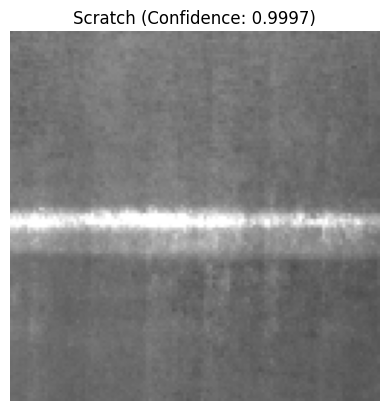

Prediction: Scratch, Probability: 0.9997


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Step 2: Preprocess image
img_size = (128, 128)  # matches your training setup
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # shape (1,128,128,3)


# Step 3: Prediction
prob = float(model.predict(img_array)[0][0])
label = "Scratch" if prob >= 0.5 else "No Scratch"
conf = prob if prob >= 0.5 else 1 - prob

# Step 4: Show result
plt.imshow(img)
plt.axis("off")
plt.title(f"{label} (Confidence: {conf:.4f})")
plt.show()

print(f"Prediction: {label}, Probability: {prob:.4f}")

**MODEL SAVED**

In [14]:
model.save("my_model.keras")

# Displaying output
print("Model saved!")

Model saved!


#Conclusion

**This project demonstrates the successful application of deep learning in a real-world quality inspection task.**
**The trained CNN model can effectively classify cooker surfaces into scratch or no scratch,making it a useful tool for automated inspection systems in manufacturing.**

**Key Takeaways**:


**The pipeline ensures end-to-end automation (data → model → predictions).**
**Achieved reliable performance that can be further improved with:** **boltext**


*  **Data augmentation techniques**
*  **Larger and more diverse dataset**

*   **Using transfer learning with pretrained models (e.g., VGG16, ResNet)**
*   **Hyperparameter tuning**



**This solution shows the potential of AI in industrial defect detection, reducing manual inspection costs and improving accuracy.**